In [40]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error
import seaborn as sb

In [34]:
DF = pd.read_csv("C:\\Users\\Admin\\Downloads\\student_habits_performance.csv",index_col=0)
DF.info()
DF.describe()
DF.head()
Q1 = DF['study_hours_per_day'].quantile(0.25)
Q3 = DF['study_hours_per_day'].quantile(0.75)
IQR = Q3-Q1

lowrlist = list(DF[DF['study_hours_per_day']<(Q1-(1.5*IQR))].index)
highlist = list(DF[DF['study_hours_per_day']>(Q3+(1.5*IQR))].index)
DF.drop(index=lowrlist,inplace=True)
DF.drop(index=highlist,inplace=True)

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, S1000 to S1999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1000 non-null   int64  
 1   gender                         1000 non-null   object 
 2   study_hours_per_day            1000 non-null   float64
 3   social_media_hours             1000 non-null   float64
 4   netflix_hours                  1000 non-null   float64
 5   part_time_job                  1000 non-null   object 
 6   attendance_percentage          1000 non-null   float64
 7   sleep_hours                    1000 non-null   float64
 8   diet_quality                   1000 non-null   object 
 9   exercise_frequency             1000 non-null   int64  
 10  parental_education_level       909 non-null    object 
 11  internet_quality               1000 non-null   object 
 12  mental_health_rating           1000 non-null   i

<Axes: >

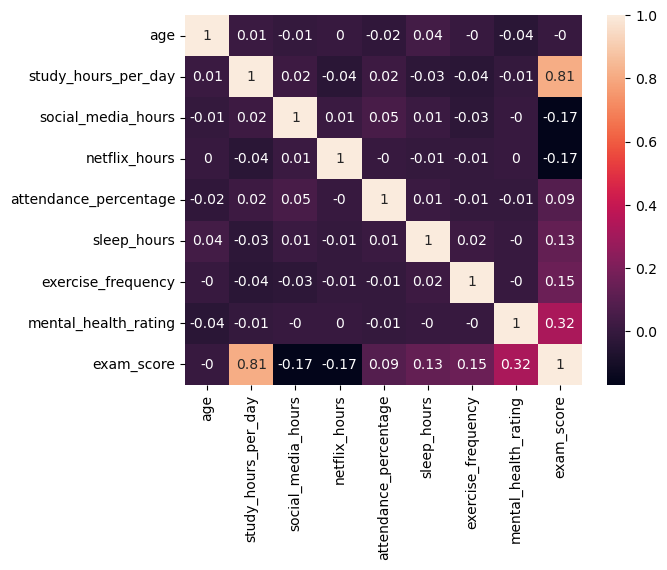

In [35]:
numCols = []
catCols =[]
ordinalCols = ['']
for i in DF.columns:
    if DF[i].dtype=='int64'or DF[i].dtype=='float64':
        numCols.append(i)
    elif DF[i].dtype=='object':
        catCols.append(i)
corrMat = DF[numCols].corr(method='spearman').map(lambda d:round(d,2))
sb.heatmap(corrMat,annot=True,annot_kws={'size':10})

In [36]:

x = DF[numCols+catCols]
x.drop(columns='exam_score',inplace=True)
y=DF['exam_score']
mode = x['parental_education_level'].mode()[0]
x.fillna({'parental_education_level':mode},inplace=True)
x.drop(columns='age',inplace=True)
x.drop(columns='gender',inplace=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_28296\1833019399.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.drop(columns='exam_score',inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_28296\1833019399.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.fillna({'parental_education_level':mode},inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_28296\1833019399.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x

In [37]:
ordinalCols = ['parental_education_level','internet_quality','extracurricular_participation','part_time_job','diet_quality']
trainx,validx,trainy,validy = train_test_split(x,y,train_size=80,random_state=0)
ltrainx =trainx.copy()
lvalidx = validx.copy()
ordEN = OrdinalEncoder()
ltrainx[ordinalCols] = ordEN.fit_transform(ltrainx[ordinalCols])
lvalidx[ordinalCols] = ordEN.transform(lvalidx[ordinalCols])
ltrainx

,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,part_time_job,diet_quality,parental_education_level,internet_quality,extracurricular_participation
student_id,,,,,,,,,,,,
S1323,2.9,1.6,1.7,100.0,6.1,0,10,0.0,1.0,0.0,1.0,0.0
S1258,5.8,3.0,0.4,66.5,3.2,2,8,0.0,0.0,1.0,0.0,0.0
S1895,2.3,1.5,2.0,83.8,5.6,3,6,0.0,0.0,0.0,0.0,0.0
S1947,4.5,3.2,3.3,70.0,6.3,0,6,1.0,1.0,1.0,1.0,1.0
S1444,2.8,1.8,2.7,79.1,9.0,4,1,0.0,2.0,2.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
S1841,3.3,1.5,1.8,81.4,6.9,5,6,1.0,0.0,1.0,0.0,0.0
S1193,4.6,0.9,1.9,86.0,4.8,4,6,0.0,1.0,2.0,1.0,0.0
S1633,4.5,1.4,1.5,75.0,8.0,2,2,0.0,1.0,2.0,1.0,1.0


<Axes: ylabel='study_hours_per_day'>

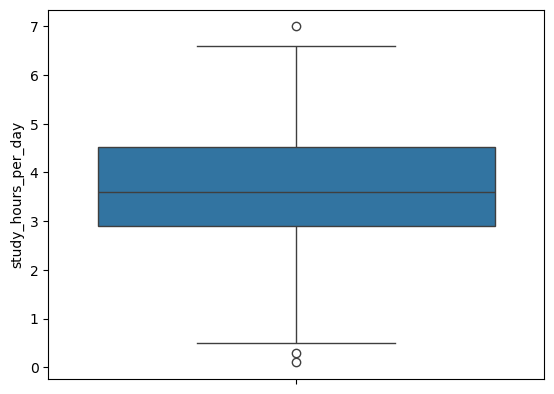

In [45]:
import seaborn as sb
corrMat = ltrainx.corr(method='pearson').map(lambda d:round(d,2))
#sb.heatmap(corrMat,annot=True,annot_kws={'size': 9})
sb.boxplot(ltrainx['study_hours_per_day'])



In [41]:
model = RandomForestRegressor(n_estimators=500,criterion='absolute_error',random_state=0)
model.fit(ltrainx,trainy)
pred = model.predict(lvalidx)
mae = mean_absolute_error(validy,pred)
mae


7.008880722891564

In [43]:
pred

array([79.5432, 60.2857, 48.1477, 42.5401, 65.0082, 81.5552, 65.7049,
       86.7808, 77.9218, 66.7388, 68.6716, 90.5688, 84.5388, 85.9668,
       62.0353, 84.949 , 86.2912, 39.3752, 79.4466, 63.8367, 60.3278,
       63.8551, 67.1174, 65.9697, 65.8166, 66.7593, 69.2974, 80.0468,
       72.1857, 71.0984, 66.0931, 90.6894, 88.5606, 58.299 , 71.403 ,
       90.822 , 66.886 , 57.0989, 46.9283, 89.4256, 79.3437, 75.8956,
       55.2766, 90.7404, 77.708 , 85.3184, 79.0145, 87.5076, 84.9638,
       67.812 , 54.6623, 66.9205, 73.3243, 59.123 , 61.1019, 83.9574,
       63.7289, 64.0569, 69.7661, 74.3015, 62.2042, 84.2338, 76.3888,
       73.0871, 72.852 , 89.5988, 63.9167, 57.0923, 68.3919, 62.6484,
       69.7732, 60.0841, 59.8968, 65.2091, 61.5878, 42.8739, 62.9644,
       77.5234, 52.5511, 68.9991, 68.6191, 85.8464, 70.4998, 68.1404,
       78.3572, 57.6948, 82.2272, 86.7816, 73.1713, 67.9488, 65.8223,
       66.01  , 59.9024, 75.1734, 71.176 , 66.5411, 58.084 , 63.5247,
       63.7546, 74.5

In [44]:
validy

student_id
S1826    87.8
S1726    77.4
S1031    51.3
S1552    31.5
S1974    70.9
         ... 
S1784    91.3
S1120    87.9
S1877    36.9
S1292    74.2
S1057    75.2
Name: exam_score, Length: 913, dtype: float64